In [1]:
## MOUNTING THE DRIVE TO THE COLLAB NOTEBOOK
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# importing libraries


In [2]:
import pandas as pd
import numpy as np
import scipy as py

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns



# exploring the data

In [3]:
#Loading data
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

train data

In [4]:
num_rows, num_columns = train.shape
print(num_rows, num_columns)

891 12


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#checking missing values
missing_values= train.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Inspect data types of each column
data_types = train.dtypes

# Select columns with numerical data types (int or float)
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical features:")
print(numerical_features)

Numerical features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [10]:
from scipy import stats

# Select numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Calculate Z-scores for numerical features
z_scores = stats.zscore(train[numerical_features])

# Define a threshold for outlier detection
threshold = 3

# Find outliers
outliers = (z_scores > threshold).any(axis=1)

# Print indices of rows containing outliers
print("Indices of rows containing outliers:")
print(train.index[outliers])

Indices of rows containing outliers:
Int64Index([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
            164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
            324, 341, 360, 377, 380, 386, 437, 438, 480, 527, 541, 542, 557,
            567, 610, 638, 678, 679, 683, 686, 689, 700, 716, 730, 736, 737,
            742, 774, 779, 787, 792, 813, 824, 846, 850, 858, 863, 885],
           dtype='int64')


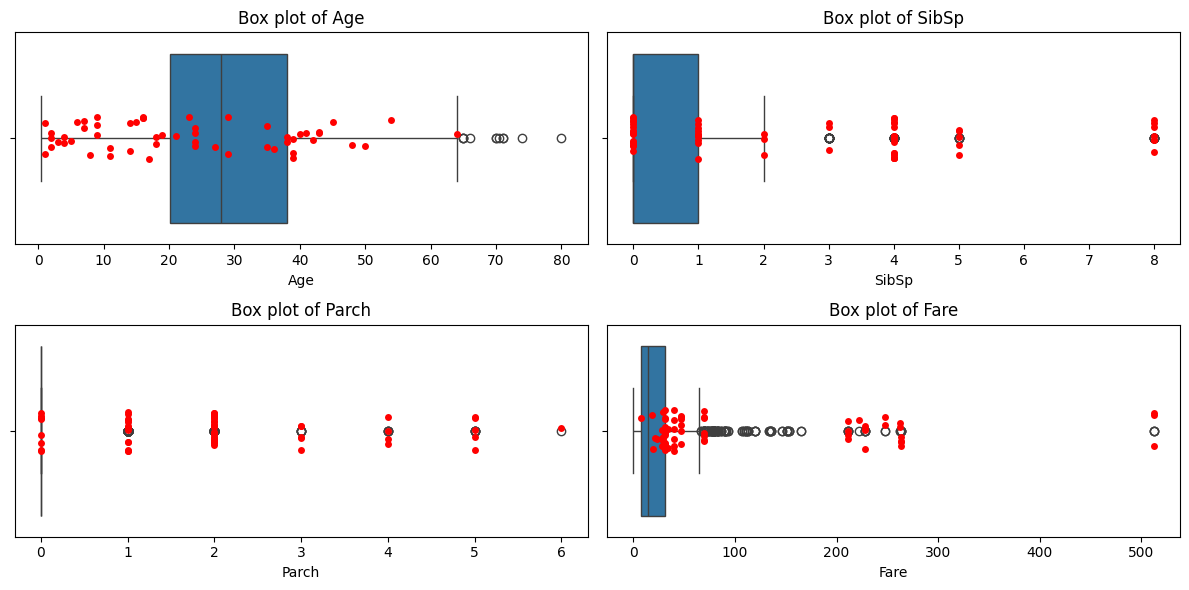

In [11]:
# Create box plots for numerical features with outliers highlighted
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[feature])
    # Highlight outliers
    sns.stripplot(x=train[feature][outliers], color='red', size=5)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

test data

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [16]:
#merging the test data with gender submission
test = pd.merge(test,gender_submission,on = "PassengerId", how= "inner")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

visualizing

<Axes: xlabel='Pclass', ylabel='Survived'>

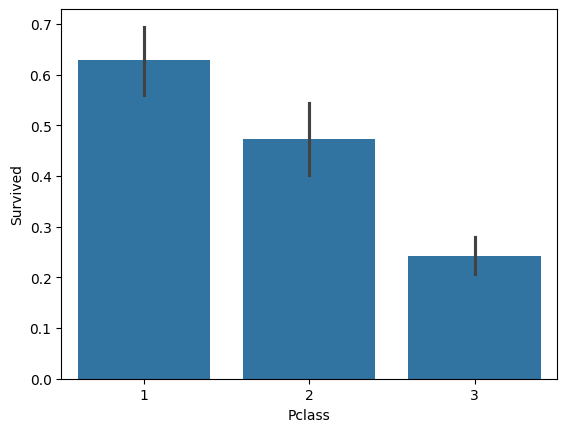

In [18]:
#Survival rate by passenger class

sns.barplot(x = 'Pclass', y = 'Survived', data = train)

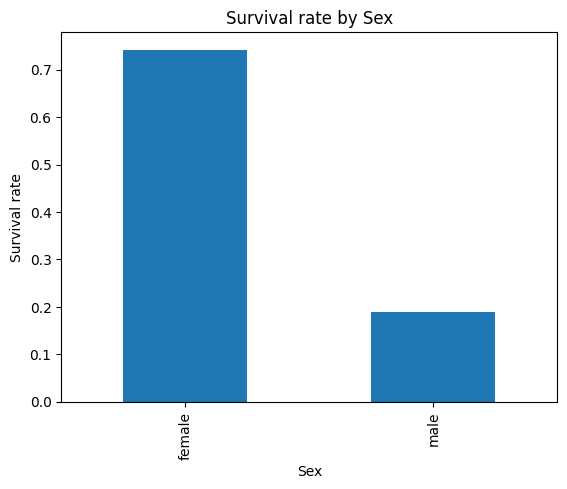

In [19]:
# Survival rate by Sex

survival_rate = train.groupby('Sex')['Survived'].mean()
survival_rate.plot(kind='bar')
plt.title('Survival rate by Sex')
plt.xlabel('Sex')
_ = plt.ylabel('Survival rate')

# Pre-Processing

In [20]:
#merge the train and test data
merged = pd.concat([train,test],ignore_index = True)
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#check missing values
merged.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
# Drop irrelevant columns
merged.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)



In [23]:
# Impute missing age values with median
median_age = merged['Age'].median()
merged['Age'].fillna(median_age, inplace=True)

In [24]:
#impute missing fare value with mean
mean_fare = merged["Fare"].mean()
merged["Fare"] = merged["Fare"].fillna(mean_fare)

In [25]:
#impute missing Embarked value with mode
mode_embarked = merged["Embarked"].mode()[0]
merged["Embarked"] = merged["Embarked"].fillna(mode_embarked)

In [26]:
merged.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [27]:
#converting categorical variables

# Perform one-hot encoding for 'Sex', 'Pclass', and 'Embarked' columns
sex_encoded = pd.get_dummies(merged['Sex'], prefix='Sex')
pclass_encoded = pd.get_dummies(merged['Pclass'], prefix='Pclass')
embarked_encoded = pd.get_dummies(merged['Embarked'], prefix='Embarked')

# Concatenate the one-hot encoded columns with the original DataFrame
merged_encoded = pd.concat([merged, sex_encoded, pclass_encoded, embarked_encoded], axis=1)

# Drop the original categorical columns
merged_encoded.drop(['Sex', 'Pclass', 'Embarked'], axis=1, inplace=True)

In [28]:
merged_encoded.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [29]:
merged_encoded.to_csv('/content/drive/My Drive/clean_titanic.csv', index=False)

In [30]:
df = pd.read_csv('/content/drive/My Drive/clean_titanic.csv')

#  model building and evaluation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
# Training Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
# Training SVM
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
# Predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
# Evaluation
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

Decision Tree:
Accuracy: 0.8015267175572519
Precision: 0.7428571428571429
Recall: 0.7572815533980582
F1 Score: 0.7499999999999999

Random Forest:
Accuracy: 0.8778625954198473
Precision: 0.8514851485148515
Recall: 0.8349514563106796
F1 Score: 0.8431372549019608

Support Vector Machine:
Accuracy: 0.6030534351145038
Precision: 0.4666666666666667
Recall: 0.06796116504854369
F1 Score: 0.11864406779661017


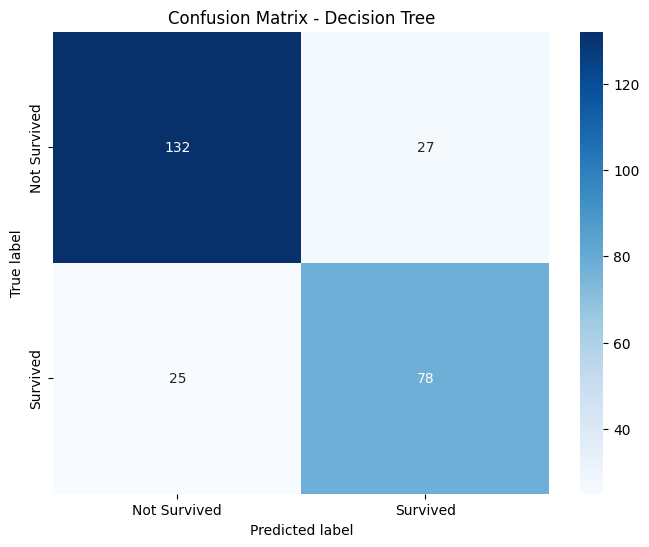

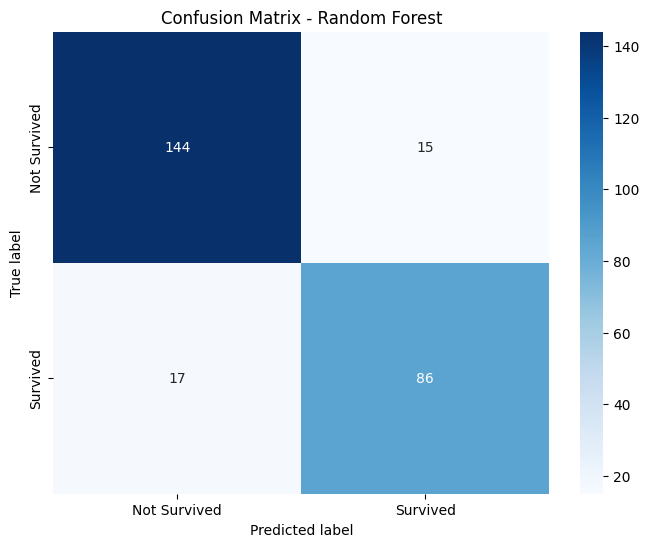

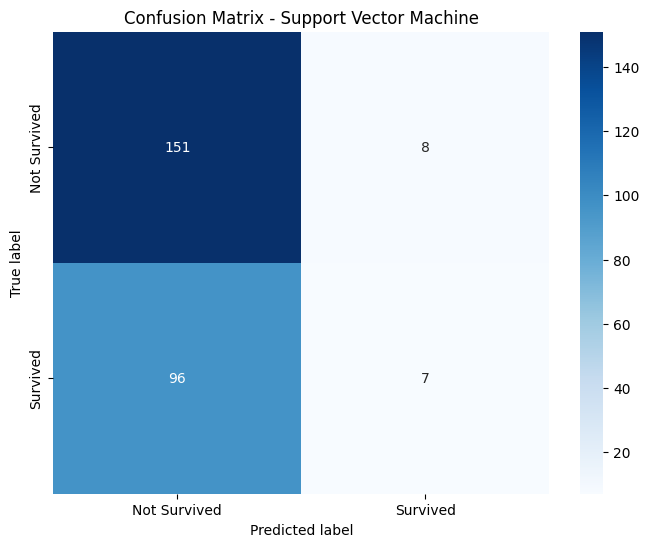

In [32]:
from sklearn.metrics import confusion_matrix

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, title='Confusion Matrix - Decision Tree')

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix - Random Forest')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, title='Confusion Matrix - Support Vector Machine')

# model tuning

In [33]:
#standardizing features.
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X =  df.drop('Survived', axis=1)
y = df['Survived'] # Target variable


# Initialize StandardScaler
scaler = StandardScaler()

# Standardize features
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the standardized features with the target variable
df_scaled = pd.concat([X_scaled_df, y], axis=1)

# Display the first few rows of the standardized DataFrame
print(df_scaled.head())

   PassengerId       Age     SibSp  Parch      Fare  Sex_female  Sex_male  \
0    -1.730728 -0.581628  0.481288 -0.445 -0.503595   -0.743497  0.743497   
1    -1.728082  0.658652  0.481288 -0.445  0.734503    1.344995 -1.344995   
2    -1.725435 -0.271558 -0.479087 -0.445 -0.490544    1.344995 -1.344995   
3    -1.722789  0.426099  0.481288 -0.445  0.382925    1.344995 -1.344995   
4    -1.720143  0.426099 -0.479087 -0.445 -0.488127   -0.743497  0.743497   

   Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Survived  
0 -0.572351 -0.518084  0.919925    -0.50977    -0.32204    0.655011         0  
1  1.747178 -0.518084 -1.087045     1.96167    -0.32204   -1.526692         1  
2 -0.572351 -0.518084  0.919925    -0.50977    -0.32204    0.655011         1  
3  1.747178 -0.518084 -1.087045    -0.50977    -0.32204    0.655011         1  
4 -0.572351 -0.518084  0.919925    -0.50977    -0.32204    0.655011         0  


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Training new SVM
new_svm_classifier = SVC(random_state=42)
# Train the SVM model on the training data
new_svm_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_svm = new_svm_classifier.predict(X_test)

In [38]:
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.8740458015267175
Precision: 0.8888888888888888
Recall: 0.7766990291262136
F1 Score: 0.8290155440414507
